In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='ticks', context='talk', font='CMU Sans Serif')

In [40]:
mixes = pd.read_csv('sensitivity.csv')
mixes

,id,matrix,size_dist,lognorm_sigma,max_load_spec,max_load,top10pct_load,oversub,was__ns3__pmn_m,p99__ns3__pmn_m,was__ns3__pmn_mc,p99__ns3__pmn_mc
0,0,Matrix C,CacheFollower,2.0,0.654671,0.677392,0.275281,1-to-1,0.109951,0.078194,0.062182,0.097348
1,1,Matrix C,CacheFollower,1.0,0.285183,0.292786,0.118982,1-to-1,0.010304,-0.015099,0.029999,-0.185985
2,2,Matrix C,CacheFollower,2.0,0.515077,0.532982,0.257363,4-to-1,0.061199,0.042824,0.037246,-0.006919
3,3,Matrix A,WebServer,1.0,0.732418,0.806744,0.644203,1-to-1,0.501056,0.202100,0.526265,0.230041
4,4,Matrix A,Hadoop,2.0,0.345586,0.383977,0.304695,1-to-1,0.077810,0.020938,0.060960,0.018026
...,...,...,...,...,...,...,...,...,...,...,...,...
187,187,Matrix C,CacheFollower,2.0,0.680340,0.703983,0.299072,2-to-1,0.125144,0.096386,0.249480,0.295377
188,188,Matrix A,CacheFollower,2.0,0.536925,0.541259,0.496130,2-to-1,0.367865,0.121423,0.388879,0.140705
189,189,Matrix B,CacheFollower,1.0,0.555442,0.559835,0.451421,4-to-1,0.245847,0.048572,0.245270,0.050904
190,190,Matrix B,WebServer,2.0,0.622410,0.663364,0.507452,4-to-1,0.405561,0.169932,0.402592,0.167827


In [41]:
mix_id = mixes.sort_values(by='p99__ns3__pmn_m').iloc[int(len(mixes) * 0.85) - 1]['id']
mixes[mixes['id'] == mix_id]

,id,matrix,size_dist,lognorm_sigma,max_load_spec,max_load,top10pct_load,oversub,was__ns3__pmn_m,p99__ns3__pmn_m,was__ns3__pmn_mc,p99__ns3__pmn_mc
25,25,Matrix A,Hadoop,1.0,0.606843,0.675288,0.564563,2-to-1,0.343954,0.099342,0.334431,0.113393


In [42]:
top5worst = mixes.sort_values(by='p99__ns3__pmn_m', ascending=False).iloc[:5];
print(top5worst[top5worst['oversub'] == '4-to-1']['max_load'].mean())
top5worst

0.7019715035289558


,id,matrix,size_dist,lognorm_sigma,max_load_spec,max_load,top10pct_load,oversub,was__ns3__pmn_m,p99__ns3__pmn_m,was__ns3__pmn_mc,p99__ns3__pmn_mc
118,118,Matrix A,WebServer,1.0,0.747272,0.775565,0.485037,4-to-1,0.662959,0.519184,0.695920,0.544130
47,47,Matrix A,WebServer,2.0,0.649453,0.672987,0.420881,4-to-1,0.394021,0.301395,0.422109,0.332662
84,84,Matrix A,WebServer,2.0,0.646378,0.670001,0.419013,4-to-1,0.387815,0.296061,0.415120,0.323165
115,115,Matrix A,WebServer,1.0,0.634980,0.658977,0.412123,4-to-1,0.332172,0.255518,0.356673,0.283432
6,6,Matrix B,WebServer,1.0,0.690173,0.732329,0.560207,4-to-1,0.548335,0.245631,0.547306,0.245016


In [43]:
top5lowest = mixes.sort_values(by='p99__ns3__pmn_m').iloc[:5];
top5lowest

,id,matrix,size_dist,lognorm_sigma,max_load_spec,max_load,top10pct_load,oversub,was__ns3__pmn_m,p99__ns3__pmn_m,was__ns3__pmn_mc,p99__ns3__pmn_mc
10,10,Matrix C,CacheFollower,1.0,0.291982,0.299772,0.127351,2-to-1,0.011346,-0.021160,0.051798,0.226558
124,124,Matrix C,CacheFollower,1.0,0.330809,0.339630,0.138019,1-to-1,0.012887,-0.020778,0.038402,-0.194610
1,1,Matrix C,CacheFollower,1.0,0.285183,0.292786,0.118982,1-to-1,0.010304,-0.015099,0.029999,-0.185985
21,21,Matrix C,CacheFollower,1.0,0.261649,0.268622,0.114117,2-to-1,0.010147,-0.014180,0.043977,0.191503
140,140,Matrix C,Hadoop,2.0,0.264575,0.293234,0.118978,2-to-1,0.044571,-0.007073,0.058420,0.068209


In [44]:
mix_dir = f'../data/{mix_id}'
df_ns3 = pd.read_csv(f'{mix_dir}/ns3/records.csv')
df_pmn_m = pd.read_csv(f'{mix_dir}/pmn-m/records.csv')
df_pmn_mc = pd.read_csv(f'{mix_dir}/pmn-mc/records.csv')
df_pmn = pd.read_csv(f'{mix_dir}/pmn/records.csv')
df = pd.concat([df_ns3, df_pmn_m, df_pmn_mc, df_pmn], ignore_index=True)
df.loc[df['size'] < 10_000, 'bin'] = 'Smaller than 10 KB'
df.loc[(10_000 <= df['size']) & (df['size'] <= 1_000_000), 'bin'] = '10 KB to 1 MB'
df.loc[1_000_000 < df['size'], 'bin'] = 'Larger than 1 MB'
df['pct'] = df.groupby(by=['sim', 'bin'], as_index=False)['slowdown'].rank(pct=True)

In [45]:
p99_ns3 = df_ns3['slowdown'].quantile(q=0.99)
p99_pmn_m = df_pmn_m['slowdown'].quantile(q=0.99)
print((p99_pmn_m - p99_ns3) / p99_ns3)

0.09934195394411846


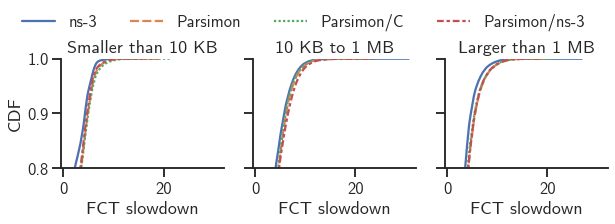

In [46]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(9, 3), sharex=True, sharey=True)
for i, bin in enumerate(df['bin'].unique()):
    ax = sns.lineplot(x='slowdown', y='pct', hue='sim', style='sim', data=df[df['bin'] == bin], ax=axs[i], ci=None)
    ax.set_title(f'{bin}')
    ax.set_ylim((0.8, 1.0))
    ax.set_xlabel('FCT slowdown')
    ax.set_ylabel('CDF')
    handles = ax.get_legend().get_lines()
    ax.get_legend().remove()
# XXX: This is a dirty hack. Comment the above line to check handles and labels match up before doing anything.
fig.legend(handles=handles, labels=['ns-3', 'Parsimon', 'Parsimon/C', 'Parsimon/ns-3'], loc='upper center', frameon=False, ncol=4, bbox_to_anchor=(0.5, 1.1))
fig.tight_layout()
sns.despine()
# plt.savefig('figs/one-scenario.pdf', bbox_inches='tight')
